In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import nltk
import missingno as msno
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

In [4]:

df.sample(8).reset_index(drop=True).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,72,73,74
1,male,group A,bachelor's degree,free/reduced,completed,49,58,60
2,female,group B,associate's degree,standard,none,82,80,77
3,female,group B,associate's degree,standard,none,57,69,68
4,female,group C,associate's degree,standard,none,49,53,53
5,female,group D,high school,standard,completed,56,68,74
6,male,group E,bachelor's degree,standard,none,82,62,62
7,female,group D,associate's degree,free/reduced,none,56,65,63


# **Exploratory Data Analysis**

In [5]:

df.head(15).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:

df.shape

(1000, 8)

In [7]:

df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Univariate Analysis 📉 (explore each columns)**

In [15]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
race_ethnicity=df['gender'].value_counts()
fig=px.pie(values=race_ethnicity.values,
          names=race_ethnicity.index,
          color_discrete_sequence=px.colors.sequential.PuBu,
          title="Race/Ethnicity distribution", template="plotly_dark")

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [17]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [18]:

race_ethnicity=df['race/ethnicity'].value_counts()
fig=px.pie(values=race_ethnicity.values,
          names=race_ethnicity.index,
          color_discrete_sequence=px.colors.sequential.PuBu,
          title="Race/Ethnicity distribution", template="plotly_dark")

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [19]:
level=df['parental level of education'].value_counts()

In [20]:

fig=px.bar(y=level.values,
          x=level.index,
          color=level.index,
          color_discrete_sequence=px.colors.sequential.deep,
          text=level.values,
          title="Parental level of education distribution",
          template="plotly_dark")
fig.update_layout(xaxis_title="Level of education",
                 yaxis_title="Count",
                 font=dict(size=17,family="Franklin Gpthic"))
fig.show()

In [21]:

df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [22]:

lunch = df['lunch'].value_counts()

fig = px.bar(y=lunch.values, 
             x=lunch.index, 
             color = lunch.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=lunch.values,
             title= 'Distribution of Lunch type',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Lunch type",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [23]:

df['test preparation course'].value_counts()


none         642
completed    358
Name: test preparation course, dtype: int64

In [24]:
race_ethnicity=df['test preparation course'].value_counts()
fig=px.pie(values=race_ethnicity.values,
          names=race_ethnicity.index,
          color_discrete_sequence=px.colors.sequential.PuBu,
          title="Race/Ethnicity distribution", template="plotly_dark")

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [25]:
group_labels = ['math score']
fig1 = px.box(y=df['math score'],template= 'plotly_dark', title = 'Math score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

In [26]:

group_labels = ['reading score']
fig1 = px.box(y=df['reading score'],template= 'plotly_dark', title = 'Reading score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

In [27]:
group_labels = ['writing score']
fig1 = px.box(y=df['writing score'],template= 'plotly_dark', title = 'Writing score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()


# **Multivariate Analysis 📈 (explore relationship between attributes)**

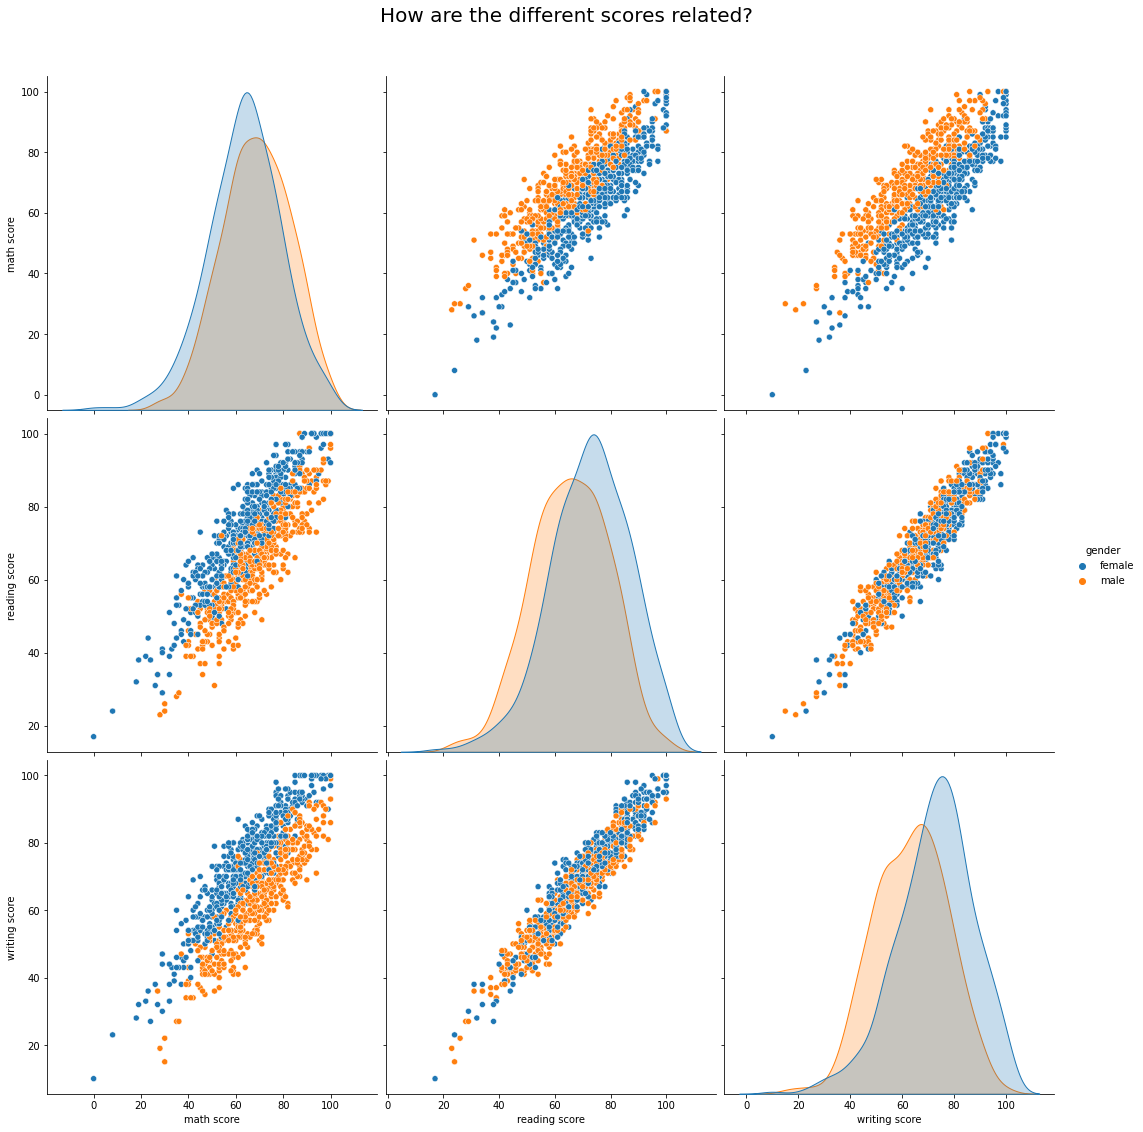

In [28]:
fig = sns.pairplot(df[["math score", "reading score", "writing score", "gender"]], hue="gender", height=5);
fig.fig.suptitle("How are the different scores related?", size=20, y=1.05);

**Parental level of eduction and scores**

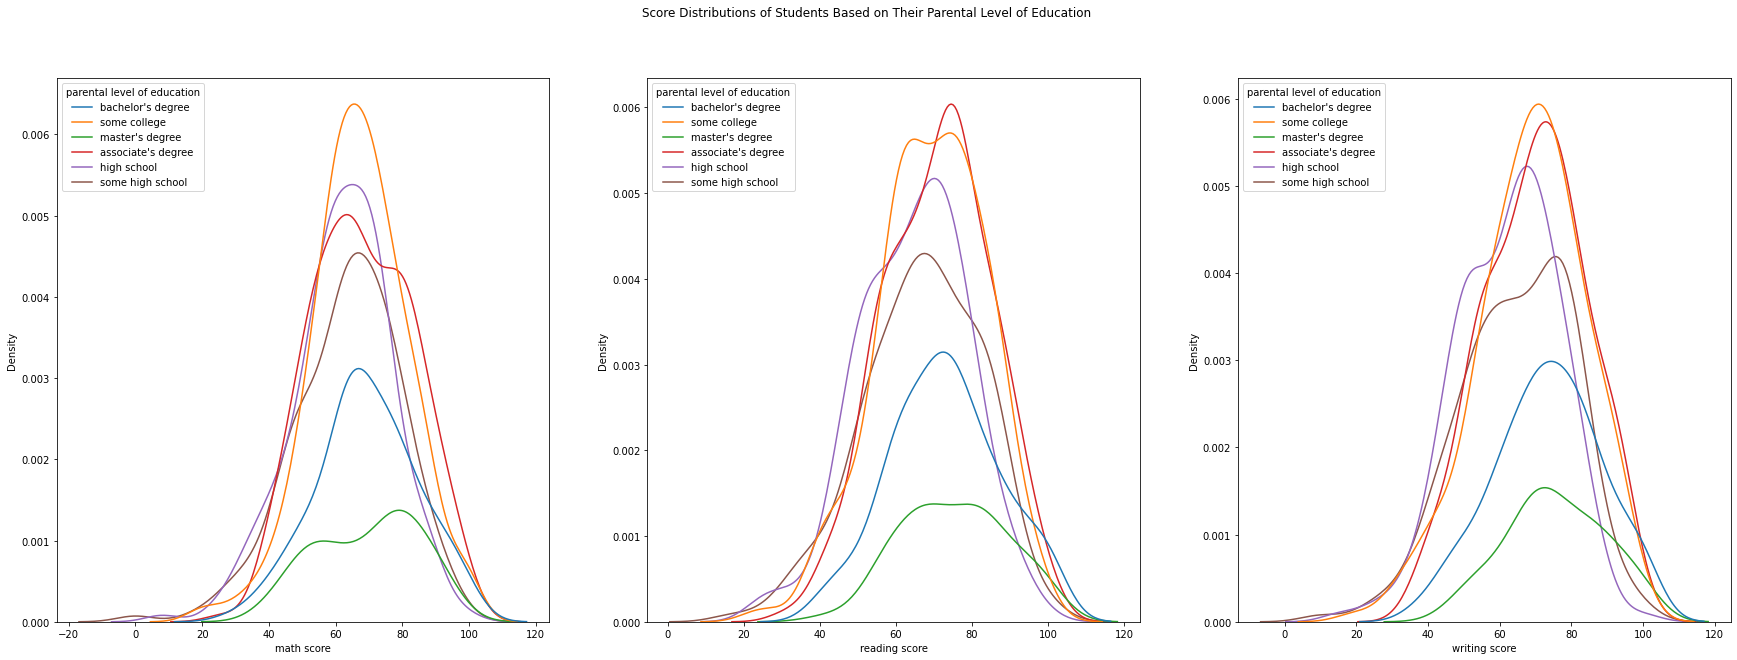

In [29]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='parental level of education')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='parental level of education')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

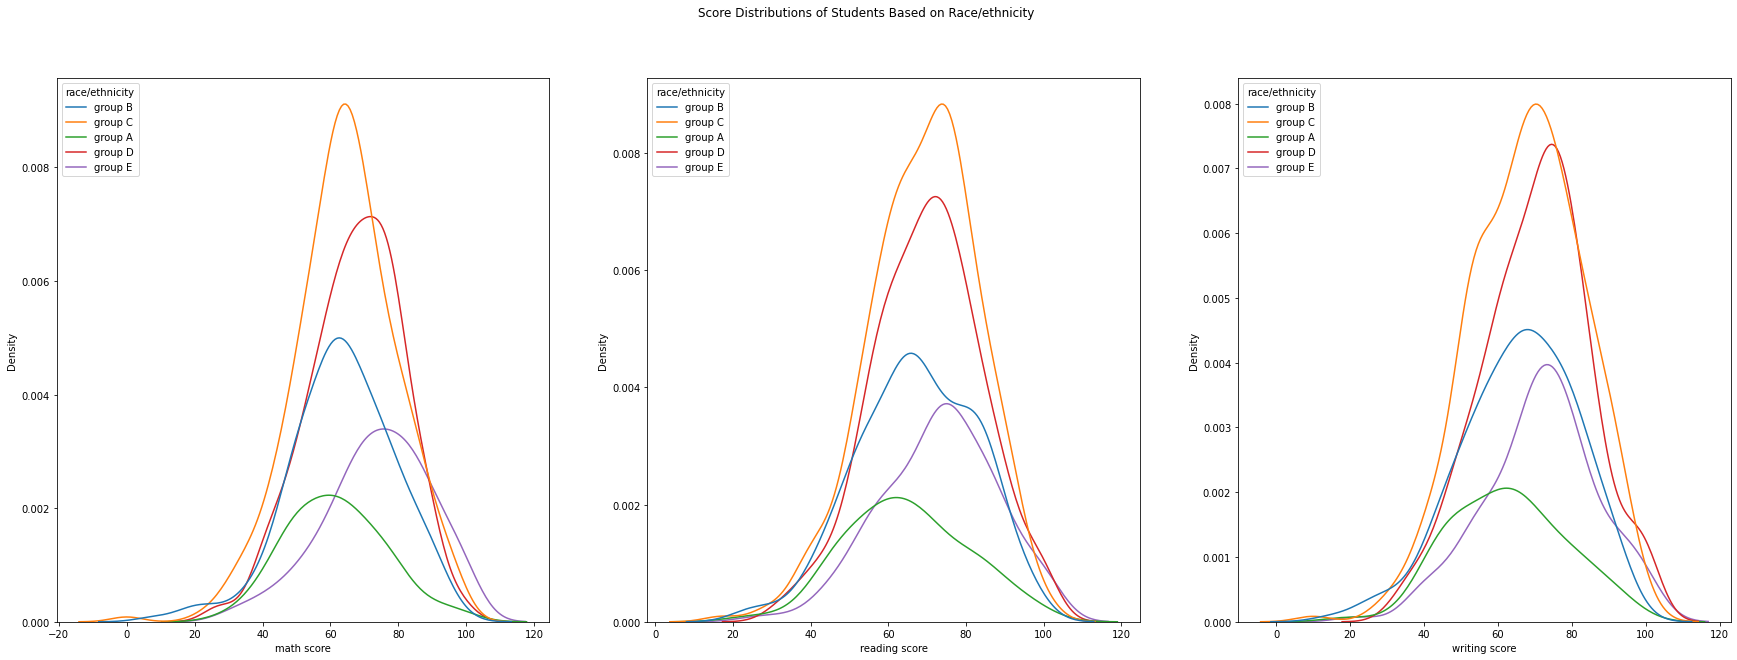

In [30]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Race/ethnicity')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='race/ethnicity')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='race/ethnicity')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='race/ethnicity')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

In [31]:
fig=px.sunburst(df,path=['race/ethnicity','parental level of education'])
fig.show();